## 1. Salaries in data field

Go to [kaggle and download this dataset on job salaries in the data field](https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs). In this exercise it is many cases easier to solve the exercises if you combine duckdb with pandas for analysis.

&nbsp; a) Start with some simple EDA, check summary statistics, info, columns etc

&nbsp; b) Plot the distribution of the salaries in USD.

&nbsp; c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

&nbsp; d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

&nbsp; f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings

&nbsp; g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?

&nbsp; h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.

&nbsp; i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

In [2]:
import pandas as pd

df = pd.read_csv("../../data/salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [3]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [5]:
df.shape

(151445, 11)

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


<Axes: xlabel='work_year'>

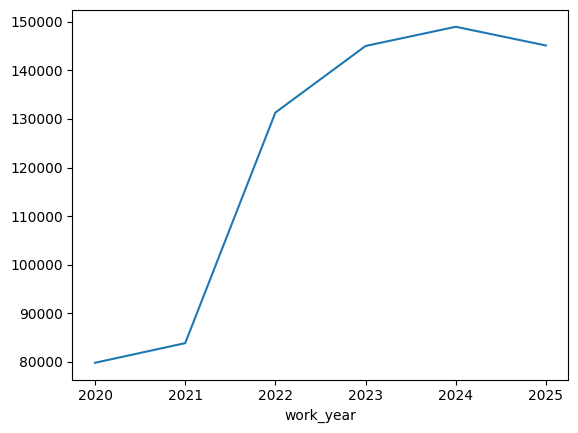

In [7]:
# b) Plot the distribution of the salaries in USD.
salary_distribution = df.groupby("work_year")["salary_in_usd"].median()
salary_distribution.plot(x="work_year", y="salary_in_usd")

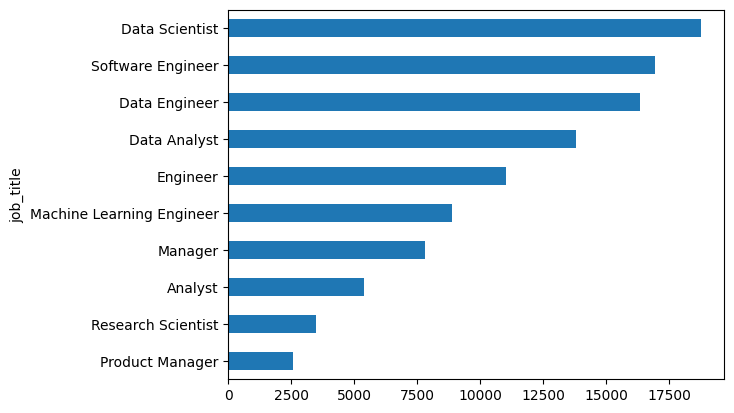

In [8]:
# c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.
most_common_jobs = df["job_title"].value_counts().head(10)
ax = most_common_jobs.plot(kind="barh", x="job_title", y="count")
ax.invert_yaxis()


In [9]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
5,2025,MI,FT,Engineer,140000,USD,140000,US,100,US,M
6,2025,SE,FT,AI Product Lead,175000,USD,175000,US,100,US,M
7,2025,SE,FT,AI Product Lead,152900,USD,152900,US,100,US,M
8,2025,SE,FT,AI Engineer,97900,USD,97900,US,100,US,M
9,2025,SE,FT,AI Engineer,89900,USD,89900,US,100,US,M


In [13]:
# d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.
usd_to_sek = 9.62
salary_sek_df = (df.groupby(["job_title", "experience_level"]).agg(median_salary_usd=("salary_in_usd", "median"), mean_salary_usd=("salary_in_usd", "mean")).reset_index())
salary_sek_df["mean_salary_sek"] = salary_sek_df["mean_salary_usd"] * usd_to_sek
salary_sek_df = salary_sek_df.sort_values("mean_salary_sek", ascending=False).reset_index(drop=True)
salary_sek_df

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
0,AI Architect,MI,800000.0,800000.0,7696000.00
1,Research Team Lead,SE,450000.0,450000.0,4329000.00
2,Principal Data Scientist,EX,416000.0,416000.0,4001920.00
3,Analytics Engineering Manager,SE,399880.0,399880.0,3846845.60
4,Data Science Tech Lead,SE,375000.0,375000.0,3607500.00
...,...,...,...,...,...
932,Alternance,EN,19825.0,19825.0,190716.50
933,Stage,MI,19578.5,19578.5,188345.17
934,Data Analyst Lead,EN,18000.0,18000.0,173160.00
935,Quantitative Risk Analyst,MI,18000.0,18000.0,173160.00


In [15]:
import duckdb

mean_salary_sek = duckdb.query(
    """
    SELECT
        job_title,
        experience_level,
        MEDIAN(salary_in_usd) AS median_salary_usd,
        MEAN(salary_in_usd) AS mean_salary_usd,
        mean_salary_usd * 9.62 AS mean_salary_sek
    FROM
        df
    GROUP BY
        job_title, experience_level
    ORDER BY
        mean_salary_sek DESC
"""
).df()
mean_salary_sek

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
0,AI Architect,MI,800000.0,800000.0,7696000.00
1,Research Team Lead,SE,450000.0,450000.0,4329000.00
2,Principal Data Scientist,EX,416000.0,416000.0,4001920.00
3,Analytics Engineering Manager,SE,399880.0,399880.0,3846845.60
4,Data Science Tech Lead,SE,375000.0,375000.0,3607500.00
...,...,...,...,...,...
932,Alternance,EN,19825.0,19825.0,190716.50
933,Stage,MI,19578.5,19578.5,188345.17
934,Quantitative Risk Analyst,MI,18000.0,18000.0,173160.00
935,Data Analyst Lead,EN,18000.0,18000.0,173160.00


In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [17]:
# f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings
salary_sek_df["monthly_salary_sek"] = salary_sek_df["mean_salary_sek"] / 12

salary_sek_df

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek,monthly_salary_sek
0,AI Architect,MI,800000.0,800000.0,7696000.00,641333.333333
1,Research Team Lead,SE,450000.0,450000.0,4329000.00,360750.000000
2,Principal Data Scientist,EX,416000.0,416000.0,4001920.00,333493.333333
3,Analytics Engineering Manager,SE,399880.0,399880.0,3846845.60,320570.466667
4,Data Science Tech Lead,SE,375000.0,375000.0,3607500.00,300625.000000
...,...,...,...,...,...,...
932,Alternance,EN,19825.0,19825.0,190716.50,15893.041667
933,Stage,MI,19578.5,19578.5,188345.17,15695.430833
934,Data Analyst Lead,EN,18000.0,18000.0,173160.00,14430.000000
935,Quantitative Risk Analyst,MI,18000.0,18000.0,173160.00,14430.000000


<Axes: xlabel='experience_level'>

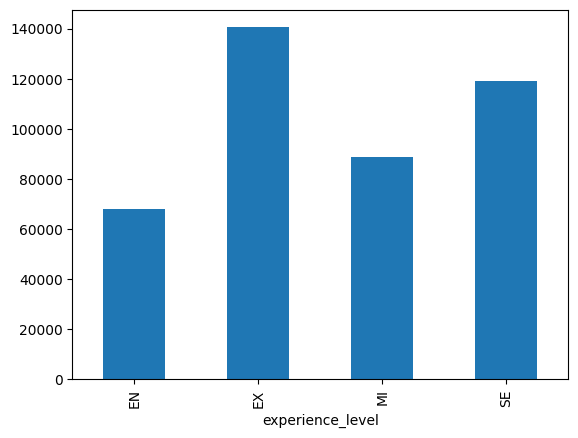

In [20]:
# g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?
exp_levels = salary_sek_df.groupby("experience_level")["monthly_salary_sek"].median().plot(kind="bar")
exp_levels

<Axes: xlabel='job_title'>

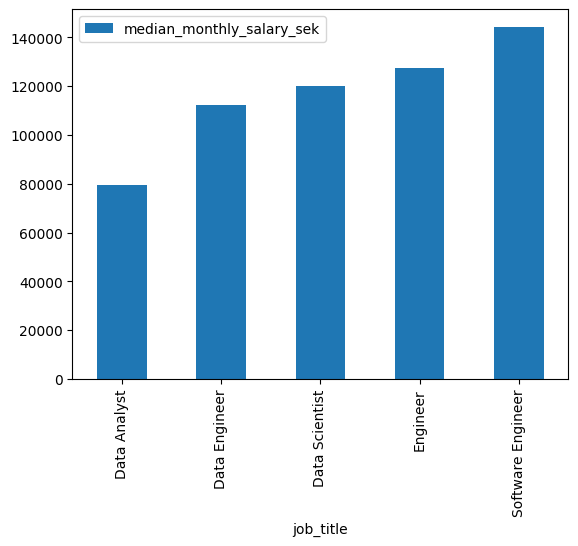

In [ ]:
# h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.
top5_common_jobs = duckdb.query(
    """
    SELECT
        job_title,
        MEDIAN(((salary_in_usd*9.62)/12)) AS median_monthly_salary_sek,
        COUNT(job_title) AS total_jobs,
    FROM
        df
    GROUP BY
        job_title
    ORDER BY
        total_jobs DESC
    LIMIT 5
"""
).df()
top5_common_jobs.sort_values("median_monthly_salary_sek").plot(kind="bar", x="job_title", y="median_monthly_salary_sek")

In [81]:
# i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.
country_codes = pd.read_csv("../../data/country_codes.csv")

,country,median_monthly_salary_sek,job_postings
0,United States,121212.000000,135569
1,Canada,96200.000000,6208
2,United Kingdom,60606.000000,4181
3,Australia,94086.005000,595
4,Netherlands,57720.000000,482
5,Germany,70361.481667,455
6,France,45568.336667,437
7,Lithuania,43576.595833,372
8,Austria,40777.576667,355
9,Spain,38948.975000,307


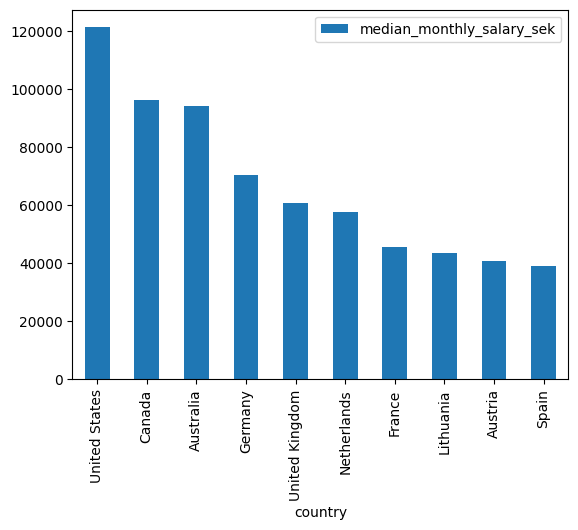

In [99]:
joined_df = duckdb.query(
    """
    SELECT
        country,
        MEDIAN(((salary_in_usd*9.62)/12)) AS median_monthly_salary_sek,
        COUNT(country) AS job_postings
    FROM
        df
    INNER JOIN
        country_codes ON df.company_location = country_codes.code
    GROUP BY
        country
    ORDER BY
        job_postings DESC
    LIMIT 10
"""
).df()
joined_df.sort_values("median_monthly_salary_sek", ascending=False).plot(kind="bar", x="country", y="median_monthly_salary_sek")
joined_df